<a href="https://colab.research.google.com/github/hariharan1821/Soduko_solver/blob/main/Soduko_Solver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
from tensorflow.keras.models import load_model
import imutils

In [ ]:
def find_empty(board):
    """checkes where is an empty or unsolved block"""
    for i in range(len(board)):
        for j in range(len(board[0])):
            if board[i][j] == 0:
                return (i, j)  # row, col

    return None

def valid(board, num, pos):
    # Check row
    for i in range(len(board[0])):
        if board[pos[0]][i] == num and pos[1] != i:
            return False

    # Check column
    for i in range(len(board)):
        if board[i][pos[1]] == num and pos[0] != i:
            return False

    # Check box
    box_x = pos[1] // 3
    box_y = pos[0] // 3

    for i in range(box_y*3, box_y*3 + 3):
        for j in range(box_x * 3, box_x*3 + 3):
            if board[i][j] == num and (i,j) != pos:
                return False

    return True


def solve(board):
    find = find_empty(board)
    if not find:
        return True
    else:
        row, col = find

    for i in range(1,10):
        if valid(board, i, (row, col)):
            board[row][col] = i

            if solve(board):
                return True
            board[row][col] = 0
    return False


def get_board(bo):
    """Takes a 9x9 matrix unsolved sudoku board and returns a fully solved board."""
    if solve(bo):
        return bo
    else:
        raise ValueError




In [ ]:
# import matplotlib.pyplot as plt
# from tensorflow.keras.datasets import mnist
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.models import Sequential
# from sklearn.preprocessing import LabelBinarizer
# from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
# import joblib


# (x_train, y_train), (x_test, y_test) = mnist.load_data()

# inp_shape = (28,28,1)

# model = Sequential() 

# model.add(Conv2D(32,(5,5),input_shape=inp_shape,padding='same',activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.2))

# model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.2))

# model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.2))

# model.add(Conv2D(256,(3,3),padding='same',activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.2))

# model.add(Flatten())

# model.add(Dense(128,activation='relu'))
# model.add(Dropout(0.5))

# model.add(Dense(64,activation='relu'))
# model.add(Dropout(0.5))

# model.add(Dense(32,activation='relu'))
# model.add(Dropout(0.5))

# model.add(Dense(10,activation='softmax'))

# model.summary()



# x_train.shape




# x_train = x_train.reshape((x_train.shape[0],28,28,1))
# x_test = x_test.reshape((x_test.shape[0],28,28,1))
# x_train.shape




# x_train = x_train.astype('float32')/255.0
# x_test = x_test.astype('float32')/255.0




# plt.imshow(x_train[1].reshape((28,28)),cmap='gray')




# lb = LabelBinarizer()
# y_train = lb.fit_transform(y_train)
# y_test = lb.transform(y_test)



# E = 10
# BS = 128
# LR = 1e-3
# model.compile(optimizer=Adam(learning_rate=LR),
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

# history = model.fit(x_train,y_train,epochs=E,batch_size=BS,verbose=1,validation_data=(x_test,y_test))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 19, 19, 128)       73856     
                                                                 
 dropout (Dropout)           (None, 19, 19, 128)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 17, 17, 128)       147584    
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 64)          7

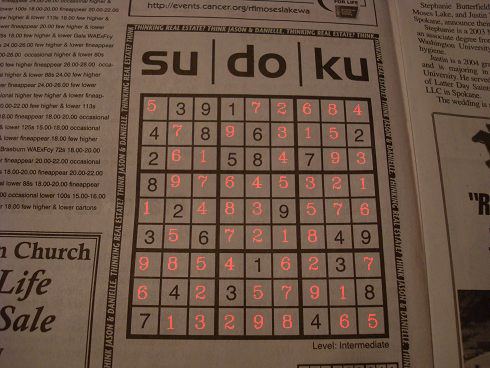

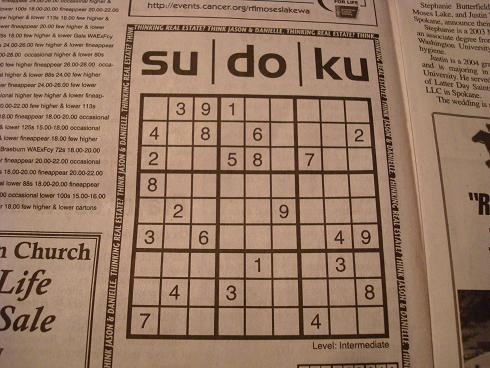

In [ ]:
classes = np.arange(0, 10)

model = load_model('/content/drive/MyDrive/sem8/DL/sudoku-solver-python/model-OCR.h5')
print(model.summary())
input_size = 48


def get_perspective(img, location, height = 900, width = 900):
    """Takes an image and location os interested region.
        And return the only the selected region with a perspective transformation"""
    pts1 = np.float32([location[0], location[3], location[1], location[2]])
    pts2 = np.float32([[0, 0], [width, 0], [0, height], [width, height]])

    # Apply Perspective Transform Algorithm
    matrix = cv2.getPerspectiveTransform(pts1, pts2)
    result = cv2.warpPerspective(img, matrix, (width, height))
    return result

def get_InvPerspective(img, masked_num, location, height = 900, width = 900):
    """Takes original image as input"""
    pts1 = np.float32([[0, 0], [width, 0], [0, height], [width, height]])
    pts2 = np.float32([location[0], location[3], location[1], location[2]])

    # Apply Perspective Transform Algorithm
    matrix = cv2.getPerspectiveTransform(pts1, pts2)
    result = cv2.warpPerspective(masked_num, matrix, (img.shape[1], img.shape[0]))
    return result





def find_board(img):
    """Takes an image as input and finds a sudoku board inside of the image"""
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    bfilter = cv2.bilateralFilter(gray, 13, 20, 20)
    edged = cv2.Canny(bfilter, 30, 180)
    keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contours  = imutils.grab_contours(keypoints)

    newimg = cv2.drawContours(img.copy(), contours, -1, (0, 255, 0), 3)
    # cv2.imshow("Contour", newimg)


    contours = sorted(contours, key=cv2.contourArea, reverse=True)[:15]
    location = None
    
    # Finds rectangular contour
    for contour in contours:
        approx = cv2.approxPolyDP(contour, 15, True)
        if len(approx) == 4:
            location = approx
            break
    result = get_perspective(img, location)
    return result, location


# split the board into 81 individual images
def split_boxes(board):
    """Takes a sudoku board and split it into 81 cells. 
        each cell contains an element of that board either given or an empty cell."""
    rows = np.vsplit(board,9)
    boxes = []
    for r in rows:
        cols = np.hsplit(r,9)
        for box in cols:
            box = cv2.resize(box, (input_size, input_size))/255.0
            # cv2.imshow("Splitted block", box)
            # cv2.waitKey(50)
            boxes.append(box)
    cv2.destroyAllWindows()
    return boxes

def displayNumbers(img, numbers, color=(0, 0, 255)):
    """Displays 81 numbers in an image or mask at the same position of each cell of the board"""
    W = int(img.shape[1]/9)
    H = int(img.shape[0]/9)
    for i in range (9):
        for j in range (9):
            if numbers[(j*9)+i] !=0:
                cv2.putText(img, str(numbers[(j*9)+i]), (i*W+int(W/2)-int((W/4)), int((j+0.7)*H)), cv2.FONT_HERSHEY_COMPLEX, 2, color, 2, cv2.LINE_AA)
    return img

# Read image
img = cv2.imread('/content/drive/MyDrive/sem8/DL/sudoku-solver-python/sudoku1.jpg')


# extract board from input image
board, location = find_board(img)


gray = cv2.cvtColor(board, cv2.COLOR_BGR2GRAY)
# print(gray.shape)
rois = split_boxes(gray)
rois = np.array(rois).reshape(-1, input_size, input_size, 1)

# get prediction
prediction = model.predict(rois)
# print(prediction)

predicted_numbers = []
# get classes from prediction
for i in prediction: 
    index = (np.argmax(i)) # returns the index of the maximum number of the array
    predicted_number = classes[index]
    predicted_numbers.append(predicted_number)


# reshape the list 
board_num = np.array(predicted_numbers).astype('uint8').reshape(9, 9)



# solve the board
try:
    solved_board_nums = get_board(board_num)

    # create a binary array of the predicted numbers. 0 means unsolved numbers of sudoku and 1 means given number.
    binArr = np.where(np.array(predicted_numbers)>0, 0, 1)
    # print(binArr)
    # get only solved numbers for the solved board
    flat_solved_board_nums = solved_board_nums.flatten()*binArr
    # create a mask
    mask = np.zeros_like(board)
    # displays solved numbers in the mask in the same position where board numbers are empty
    solved_board_mask = displayNumbers(mask, flat_solved_board_nums)
    # cv2.imshow("Solved Mask", solved_board_mask)
    inv = get_InvPerspective(img, solved_board_mask, location)
    # cv2.imshow("Inverse Perspective", inv)
    combined = cv2.addWeighted(img, 0.7, inv, 1, 0)
    cv2_imshow(combined)
    # cv2.waitKey(0)
    

except:
    print("Solution doesn't exist. Model misread digits.")

cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()